# Assignment 2

### MACS 30000, Dr. Evans
### Ruixi Li

Due Wednesday, Oct. 17 at 11:30 AM

In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# plt.style.use('seaborn')
import seaborn as sns

#Turn of Notebook Package Warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Imputing age and gender

#### (a) Proposed solution
For the age, I will use variables total income and weight in SurveyIncome.txt to fit a linear regression model. Then, I will use weight and the sum of labor income and capital income in BestIncome.txt to predict age into the BestIncome.txt.

$$age = \beta_0 + \beta_1 \times tot\underline{ }inc + \beta_2 \times wgt + \epsilon$$

For the gender, I will use variables total income and weight in SurveyIncome.txt to fit a logit model. Then, I will use weight and the sum of labor income and capital income in BestIncome.txt to predict age into the BestIncome.txt.

$$logit(female) = \beta_0 + \beta_1 \times tot\underline{ }inc + \beta_2 \times wgt + \epsilon$$

To calculate the sum of labor income and capital income, I will use the following equation:


In [2]:
# read in my data of BestIncome.txt
BestIncome = pd.read_csv("BestIncome.txt", header=None)
BestIncome.head()

,0,1,2,3
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [3]:
# name my variables of BestIncome.txt
BestIncome_cols = ['lab_inc','cap_inc','hgt','wgt']
BestIncome.columns = BestIncome_cols
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [4]:
# run descriptive statistics of BestIncome.txt
BestIncome.describe()

,lab_inc,cap_inc,hgt,wgt
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,57052.925133,9985.798563,65.014021,150.006011
std,8036.544363,2010.123691,1.999692,9.973001
min,22917.607900,1495.191896,58.176154,114.510700
25%,51624.339880,8611.756679,63.652971,143.341979
50%,56968.709935,9969.840117,65.003557,149.947641
75%,62408.232277,11339.905773,66.356915,156.724586
max,90059.898537,19882.320069,72.802277,185.408280


In [5]:
# read in my data of SurveyIncome.txt
SurveyIncome = pd.read_csv("SurveyIncome.txt", header=None)
SurveyIncome.head()

,0,1,2,3
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [6]:
# name my variables of SurveyIncome.txt
SurveyIncome_cols = ['tot_inc','wgt','age','female']
SurveyIncome.columns = SurveyIncome_cols
SurveyIncome.head()

,tot_inc,wgt,age,female
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [7]:
# run descriptive statistics of SurveyIncome.txt
SurveyIncome.describe()

,tot_inc,wgt,age,female
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,64871.210860,149.542181,44.839320,0.50000
std,9542.444214,22.028883,5.939185,0.50025
min,31816.281649,99.662468,25.741333,0.00000
25%,58349.862384,130.179235,41.025231,0.00000
50%,65281.271149,149.758434,44.955981,0.50000
75%,71749.038000,170.147337,48.817644,1.00000
max,92556.135462,196.503274,66.534646,1.00000


#### (b) Here is where I'll use my proposed method from part (a) to impute age.

In [8]:
# Define Outcome and Independent Variables
outcome = 'age'
features = ['tot_inc','wgt']

X,y = SurveyIncome[features], SurveyIncome[outcome]

In [9]:
X.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [10]:
y.head()

0    46.610021
1    48.791349
2    48.429894
3    41.543926
4    41.201245
Name: age, dtype: float64

In [11]:
# run regression

X = sm.add_constant(X, prepend=False)

m = sm.OLS(y, X)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Wed, 31 Oct 2018   Prob (F-statistic):              0.531
Time:                        17:02:41   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc      2.52e-05   2.26e-05      1.114      0.2

I obtained the following linear regression equation:
$$age = 44.2097 + 0.0000252 tot\underline{ }inc - 0.0067wgt$$

Then, I will predict age in BestIncome.txt:

In [12]:
# get total income by adding labor income and capital income toghether
BestIncome['tot_inc'] = BestIncome['lab_inc'] + BestIncome['cap_inc']

In [13]:
# predit age
X = BestIncome[features]
X = sm.add_constant(X, prepend = False)
BestIncome['age'] = res.predict(X)
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,age
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.742614
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.154387
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.742427
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.915836
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.551391


Here is where I'll use my proposed method from part (a) to impute gender.

In [14]:
# Define Outcome and Independent Variables
outcome = 'female'
features = ['tot_inc','wgt']

X,y = SurveyIncome[features], SurveyIncome[outcome]

In [15]:
X.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [16]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: female, dtype: float64

In [17]:
# run regression

X = sm.add_constant(X, prepend=False)

m = sm.Logit(y, X)

res = m.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        17:02:41   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc       -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
wgt           -0.4460      0

I obtained the following logit regression equation:
$$logit(female) = 76.7929 - 0.0002 \times tot\underline{ }inc - 0.4460 \times wgt$$

Then, I will predict gender in BestIncome.txt:

In [18]:
# predict gender
X = BestIncome[features]
X = sm.add_constant(X, prepend = False)
BestIncome['gender'] = res.predict(X)
BestIncome['gender'][BestIncome['gender'] >= 0.5] = 1
BestIncome['gender'][BestIncome['gender'] < 0.5] = 0
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,age,gender
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.742614,0.0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.154387,0.0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.742427,0.0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.915836,0.0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.551391,1.0


In [19]:
# drop total income in BestIncome.txt and obtain the final result
BestIncome = BestIncome.drop(columns = "tot_inc")
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,age,gender
0,52655.605507,9279.509829,64.568138,152.920634,44.742614,0.0
1,70586.979225,9451.016902,65.727648,159.534414,45.154387,0.0
2,53738.008339,8078.132315,66.268796,152.502405,44.742427,0.0
3,55128.180903,12692.670403,62.910559,149.218189,44.915836,0.0
4,44482.794867,9812.975746,68.678295,152.726358,44.551391,1.0


#### (c) Here is where I'll report the descriptive statistics for my new imputed variables.

In [20]:
# select age and gender from BestIncome.txt
Imputed = BestIncome[['age', 'gender']]
Imputed.head()

,age,gender
0,44.742614,0.0
1,45.154387,0.0
2,44.742427,0.0
3,44.915836,0.0
4,44.551391,1.0


In [21]:
# descriptive statistics of imputed variables
Imputed.describe()

,age,gender
count,10000.000000,10000.000000
mean,44.890828,0.454600
std,0.219150,0.497959
min,43.976495,0.000000
25%,44.743776,0.000000
50%,44.886944,0.000000
75%,45.038991,1.000000
max,45.703819,1.000000


#### (d) Correlation matrix for the now six variables

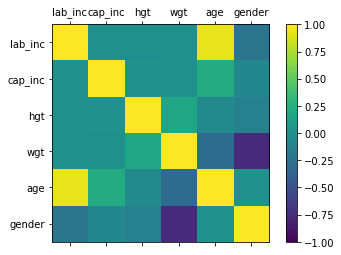

In [22]:
# Correlation Matrix Plot

def corr_plot(df):    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    

corr_plot(BestIncome)

In [23]:
# In Matrix Form
corr = BestIncome.corr()
corr.style.background_gradient()
corr

,lab_inc,cap_inc,hgt,wgt,age,gender
lab_inc,1.000000,0.005325,0.002790,0.004507,0.924053,-0.215469
cap_inc,0.005325,1.000000,0.021572,0.006299,0.234159,-0.062569
hgt,0.002790,0.021572,1.000000,0.172103,-0.045083,-0.127416
wgt,0.004507,0.006299,0.172103,1.000000,-0.300288,-0.763821
age,0.924053,0.234159,-0.045083,-0.300288,1.000000,0.020059
gender,-0.215469,-0.062569,-0.127416,-0.763821,0.020059,1.000000


### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [24]:
# Read in my third data set
IncomeIntel = pd.read_csv('IncomeIntel.txt', header=None)

In [25]:
# Name my variables
IncomeIntel_col = ['grad_year','gre_qnt','salary_p4']
IncomeIntel.columns = IncomeIntel_col
IncomeIntel.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [26]:
# Run regression model
outcome = 'salary_p4'
features = ['gre_qnt']

X, y = IncomeIntel[features], IncomeIntel[outcome]

In [27]:
X.head()

,gre_qnt
0,739.737072
1,721.811673
2,736.277908
3,770.498485
4,735.002861


In [28]:
y.head()

0    67400.475185
1    67600.584142
2    58704.880589
3    64707.290345
4    51737.324165
Name: salary_p4, dtype: float64

In [29]:
X = sm.add_constant(X, prepend=False)
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        17:02:42   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

Report coefficients and SE's：

I obtained the following OLS regression equation:
$$salary\underline{ }p4 = 89540 - 25.7632gre\underline{ }qnt$$

and the estimated coefficients and standard errors are:

$$\beta_0 = 89540 \ \ \ SE(\beta_0) = 878.764$$

$$\beta_1 = -25.7632 \ \ \ SE(\beta_1) = 1.365$$

#### (b) Create a scatterplot of GRE score and graduation year. 

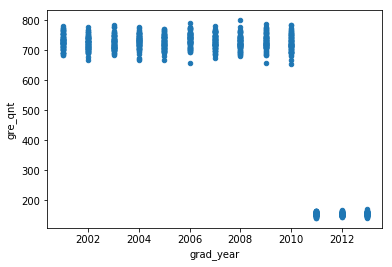

In [30]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
gre_qnt = IncomeIntel['gre_qnt']
IncomeIntel.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

As we can see from the scatterplot above and the exercise, GRE quantitative scoring scale changed in 2011. My proposed solution is to convert two ways of scaling into one.

In [31]:
# Implement the solution
# Convert two scaling methods into one by zscore each gre_qnt
IncomeIntel['new_gre_qnt'] = IncomeIntel.apply(lambda x: x.gre_qnt*170/800 
                                               if x.grad_year<2011 
                                               else x.gre_qnt, axis=1)
IncomeIntel.describe()

,grad_year,gre_qnt,salary_p4,new_gre_qnt
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2006.994000,596.510118,74173.293777,154.813605
std,3.740582,242.361960,12173.767372,5.019040
min,2001.000000,141.261398,43179.183141,139.336789
25%,2004.000000,684.983551,65778.240317,151.358400
50%,2007.000000,719.106878,73674.204810,154.680902
75%,2010.000000,739.332537,81838.874129,158.183403
max,2013.000000,799.715533,115367.665815,170.000000


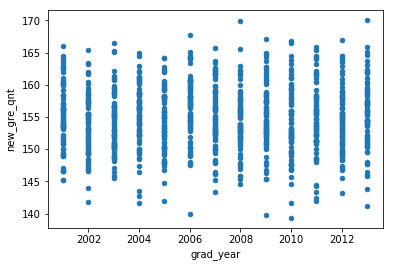

In [32]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
gre_qnt = IncomeIntel['new_gre_qnt']
IncomeIntel.plot(x='grad_year', y='new_gre_qnt', kind='scatter')
plt.show()

#### (c) Create a scatterplot of income and graduation year

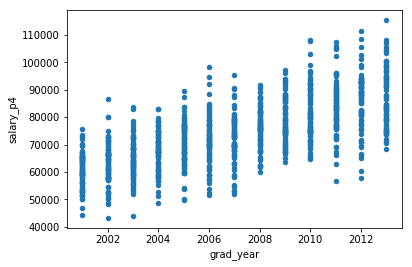

In [33]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
salary_p4 = IncomeIntel['salary_p4']
IncomeIntel.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

Because these data are not panel data, we cannot use differencing or log differencing methods to detrend them. So I will use the following method to modify the data.

In [34]:
IncomeIntel.describe()

,grad_year,gre_qnt,salary_p4,new_gre_qnt
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2006.994000,596.510118,74173.293777,154.813605
std,3.740582,242.361960,12173.767372,5.019040
min,2001.000000,141.261398,43179.183141,139.336789
25%,2004.000000,684.983551,65778.240317,151.358400
50%,2007.000000,719.106878,73674.204810,154.680902
75%,2010.000000,739.332537,81838.874129,158.183403
max,2013.000000,799.715533,115367.665815,170.000000


In [35]:
#  Code to implement a solution
avg_inc_by_year = IncomeIntel['salary_p4'].groupby(IncomeIntel['grad_year']
                                                  ).mean().values
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]
                   ) / avg_inc_by_year[:-1]).mean()
IncomeIntel['new_salary_p4'] = IncomeIntel['salary_p4'] / ((1 + avg_growth_rate
                                                           ) ** (grad_year - 2001))
IncomeIntel.describe()

,grad_year,gre_qnt,salary_p4,new_gre_qnt,new_salary_p4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2006.994000,596.510118,74173.293777,154.813605,61419.808910
std,3.740582,242.361960,12173.767372,5.019040,7135.610865
min,2001.000000,141.261398,43179.183141,139.336789,41164.726530
25%,2004.000000,684.983551,65778.240317,151.358400,56616.517414
50%,2007.000000,719.106878,73674.204810,154.680902,61467.616002
75%,2010.000000,739.332537,81838.874129,158.183403,66218.595876
max,2013.000000,799.715533,115367.665815,170.000000,84516.856633


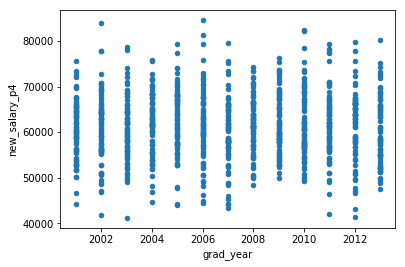

In [36]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
new_salary_p4 = IncomeIntel['new_salary_p4']
IncomeIntel.plot(x='grad_year', y='new_salary_p4', kind='scatter')
plt.show()

#### (d) Re-estimate coefficients with updated variables.

In [37]:
# Code to re-estimate, output of new coefficients
outcome = ['new_salary_p4']
features = ['new_gre_qnt']

X, y = IncomeIntel[features], IncomeIntel[outcome]

In [38]:
X = sm.add_constant(X, prepend=False)
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          new_salary_p4   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6043
Date:                Wed, 31 Oct 2018   Prob (F-statistic):              0.437
Time:                        17:02:43   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
new_gre_qnt   -34.9747     44.990     -0.777      

I obtained the following OLS regression equation:
$$new\underline{ }salary\underline{ }p4 = 6131 - 0.0402new\underline{ }gre\underline{ }qnt$$

and estimated coefficients and standard errors are:

$$\beta_0 = 6131 \ \ \ SE(\beta_0) = 492.204$$

$$\beta_1 = 0.0402 \ \ \ SE(\beta_1) = 0.164$$

Compared to the former result, this result is more reasonable after solving problems in both GRE quantitative and salary after 4 years. In the former interpretation of intercept estimator, a people with 0 GRE quantitative score can earn 89540 dollars per year. In the new model, If GRE quantitative score is 0, salary after 4 years is 6131 dollars, which is more realistic. However, the GRE quantitative have a minimum score of 130, so it is over extrapolation of intercept estimator. For the slope estimator, with each addition of GRE quantitative score, the salary after 4 years decrease 10.0695 dollars in the new model and increase 0.0402 dollars in the previous model. The hypothesis is that people with higher GRE quantitative score normally earns more salary. So the new model proved my hypothesis. But in both model, the result is not significant.

### 3. Assessment of Kossinets and Watts.

In this paper, the authors shortly present a literature review on homophily and then, bring out the research question which focuses on the origin of homophily: on what grounds do individuals selectively make or break some ties over others, and how do these choices shed light on the observation that similar people are more likely to become acquainted than dissimilar people?

To investigate more on this question, they using network data of a large university community which interactions, attributes, and affiliations are recorded. To construct the dataset, the authors merged three different databases: (1) the logs of e-mail interactions within the university over one academic year, (2) a database of individual attributes (status, gender, age, department, number of years in the community, etc.), and (3) records of course registration, in which courses were recorded separately for each semester. Dataset comprised 7,156,162 messages exchanged by 30,396 stable e-mail users during 270 days of observation. The available variables could be categorized into four groups: personal characteristics (age, gender, home state, formal status, years in school); organizational affiliations (primary department, school, campus, dormitory, academic field); course-related variables (courses taken, courses taught); and e-mail-related variables (days active, messages sent, messages received, in-degree, out-degree, reciprocated degree). A precise definitions of all variables are provided in APPENDIX. A.

In the data cleaning process, from 43,553 individuals, the authors identified 34,574 users who were active throughout both semesters by the principle of sending and receiving e-mail in both the first and the last months of the academic year. However, 43,553 individuals sent and received messages during the academic year. It is highly possible that they just didn’t send or receive e-mail in both the first and the last months of the academic year. Simply dropped 8,979 individuals may result in a biased model and diminish the authors’ ability to answer the research question.

When match the data source to theoretical construct, the authors arbitrarily suppose that the university e-mail logs fully represents the social relationships of an individual. Nevertheless, it is not necessarily the case. Let’s say a student seldom use e-mail to reach his friends. Instead, apps like Whatsup and Lines replaced e-mail with their convenience. This student is likely to be removed from the dataset in the context. Here is another example about the implicit closure. If there is a fraternity which never emails its member but has a fixed time and location for gathering, e-mail logs can’t reflect the existence of this implicit foci. After two people from one class made friends in the gathering before they become friends through class, they may communicate with each other through e-mail. Then, the e-mail logs may indicates that they are friends with the explicit foci, which is that they are in the same class.
Therefore, the dataset may fail to capture the real case.

In the chapter of origins of homophily, the authors proposed some problem on observed homophily.One might concerned that our measure of individual similarity acts, in effect, as an indicator variable for sharing a class, and that controlling for shared classes would effectively eliminate the potential for similarity to have any additional impact on tie formation, thereby artificially increasing the apparent importance of induced homophily vis-a-vis choice homophily. In order to address this potential systematic bias, the author consider in figure 7 (top row) the distribution of similarity for student pairs who shared classes with that for student pairs who did not. As expected from figure 6, students who shared classes (fig. 7, pt. B) are, on average, much more similar than students who did not (pt. A). However, its higher average notwithstanding, the distribution in part B of figure 7 also exhibits higher variance (1.8) than that in part A (1.3); thus, the potential for differences in similarity to impact tie formation is not in fact diminished for pairs who share classes versus those who do not. As a further check the authors compare distributions of similarity for pairs who share implicit foci (fig. 7, pt. D) with those who do not (pt. C). In this way, the concern can be properly addressed.


Reference:

Kossinets, Gueorgi and Duncan J. Watts, "Origins of Homophily in an Evolving Social Network," American Journal of Sociology 115:2, (2009), pp. 405-450.